# Omar Abdelgelil - Individual Project - Web Scrapping seloger for Roubaix and Tourcoing

Data Collection and Web Scrapping

In [1]:
#Download useful libraries
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver import Chrome
import pandas as pd
import time
from selenium.common.exceptions import StaleElementReferenceException
from selenium.webdriver.common.keys import Keys
import csv 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt


In [2]:
#for optimization purposes and since the search engine outputs around 43 pages and 1100 results, i will limit my data collection
# to the first 10 pages out of the 43
max_page_num = 10

In [3]:
#prepare my excel sheet file 
#with open ('results.xlsx', 'w') as f:
    #f.write("Type,Area,TotalPrice,MonthlyPrice,Address\n")

In [4]:
#this part of the code web scrappes the data of seloger.com
#The data we collected from the website is the type of the house whether it is an appartment or Maison/Villa, the area of the
# house, the total price to buy the house, the monthly price of the house, the address including whether in roubaix or 
# tourcoing plus the remaining part of the address 

driver = webdriver.Chrome(executable_path = r'C:\Users\oabdelgelil\Desktop\Python Individual\chromedriver.exe')

#defined lists for every piece of info i need in order to pass the data to them and convert them to dataframe and to excel afterwards
type_list = []
area_list = []
totalPrice_list = []
monthlyprice_list = []
address_list = []

for i in range(1,max_page_num + 1):
    page_num = i
    url = f'https://www.seloger.com/list.htm?projects=2%2C5&types=2%2C1&natures=1%2C2%2C4&places=%5B%7Bci%3A590512%7D%7C%7Bci%3A590599%7D%5D&qsVersion=1.0&LISTING-LISTpg={page_num}'
    

    driver.get(url)
    home_type = driver.find_elements_by_class_name("Card__LabelGap-sc-7insep-5.ContentZone__Title-wghbmy-6.hXERKq")
    home_area = driver.find_elements_by_class_name("ContentZone__Tags-wghbmy-7.fNlgGF")
    home_totalPrice = driver.find_elements_by_class_name("Price__Label-sc-1g9fitq-1.kYWVBR")
    home_monthlyprice = driver.find_elements_by_class_name("Price__Loan-sc-1g9fitq-6.jbBUIh")
    home_address = driver.find_elements_by_class_name("Card__LabelGap-sc-7insep-5.ContentZone__Address-wghbmy-2.eAcNsS")
    
    num_page_items = len(home_type)
    #with open('results.xlsx' , 'a') as f:
    for i in range(num_page_items):
            #f.write(home_type[i].text  ,  home_area[i].text  ,  home_totalPrice[i].text  ,  home_monthlyprice[i].text  ,  home_address[i].text)
            #f.write(home_type[i].text + "," + home_area[i].text + "," + home_totalPrice[i].text + "," + home_monthlyprice[i].text + "," + home_address[i].text + "\n")
            print(home_type[i].text + "," + home_area[i].text + "," + home_totalPrice[i].text + "," + home_monthlyprice[i].text + "," + home_address[i].text + "\n")

            type_list.append(home_type[i].text)
            area_list.append(home_area[i].text)
            totalPrice_list.append(home_totalPrice[i].text)
            monthlyprice_list.append(home_monthlyprice[i].text)
            address_list.append(home_address[i].text)

driver.close()

Appartement,3 p2 ch60 m²,95 000 €,ou 
401€/mois
**,Roubaix
Anseele-Centre-Nations Unies-Crouy-Esperence

Maison/Villa,5 p3 ch93 m²,235 000 €,ou 
977€/mois
**,Roubaix
Justice-Fraternité-Linne-Chemin Neuf

Maison/Villa,9 p6 ch350 m²,625 000 €,ou 
2 584€/mois
**,Roubaix

Maison/Villa,5 p3 ch77 m²,119 500 €,ou 
501€/mois
**,Roubaix
Edouard Vaillant-Vauban-Barbieux

Appartement,3 p2 ch71 m²,127 000 €,ou 
532€/mois
**,Tourcoing
Centre Ville-Fin de la Guerre

Appartement,3 p2 ch80 m²,99 500 €,ou 
419€/mois
**,Roubaix
Edouard Vaillant-Vauban-Barbieux

Maison/Villa,7 p6 ch300 m²,624 000 €,ou 
2 580€/mois
**,Roubaix
Hommelet

Maison/Villa,4 p3 ch95 m²,143 000 €,ou 
598€/mois
**,Tourcoing
Centre Ville-Fin de la Guerre

Maison/Villa,6 p5 ch106,02 m²,195 000 €,ou 
813€/mois
**,Tourcoing
Centre Ville-Fin de la Guerre

Maison/Villa,7 p6 ch275 m²,725 000 €,ou 
2 997€/mois
**,Roubaix

Appartement,3 p2 ch65,29 m²,195 000 €,ou 
764€/mois
**,Tourcoing
Clinquet-Bois d'Achelles

Appartement,3 p2 ch60,5 m²,1

Maison/Villa,6 p4 ch205 m²,416 000 €,ou 
1 723€/mois
**,Roubaix

Appartement,2 p1 ch60,65 m²,130 200 €,ou 
546€/mois
**,Tourcoing
Centre Ville-Fin de la Guerre

Maison/Villa,2 p1 ch58 m²,108 000 €,ou 
454€/mois
**,Tourcoing
Blanc Seau

Appartement,3 p2 ch105 m²,128 000 €,ou 
536€/mois
**,Roubaix
Anseele-Centre-Nations Unies-Crouy-Esperence

Appartement,3 p2 ch74 m²,135 000 €,ou 
565€/mois
**,Tourcoing

Maison/Villa,3 p2 ch70 m²,165 000 €,ou 
689€/mois
**,Roubaix
Epeule-Trichon

Maison/Villa,6 p4 ch115 m²,159 500 €,ou 
666€/mois
**,Roubaix

Appartement,2 p1 ch62,34 m²,155 000 €,ou 
648€/mois
**,Roubaix
Edouard Vaillant-Vauban-Barbieux

Maison/Villa,5 p4 ch120 m²,116 000 €,ou 
487€/mois
**,Roubaix
Pile

Maison/Villa,5 p4 ch102,1 m²,118 000 €,ou 
495€/mois
**,Roubaix

Maison/Villa,5 p3 ch135 m²,336 000 €,ou 
1 394€/mois
**,Roubaix
Justice-Fraternité-Linne-Chemin Neuf

Maison/Villa,6 p5 ch119 m²,299 000 €,ou 
1 241€/mois
**,Tourcoing
Francs-Brun Pain

Maison/Villa,4 p3 ch71 m²,126 700 €,ou

Appartement,2 p1 ch43 m²,119 350 €,ou 
501€/mois
**,Tourcoing
Gambetta

Appartement,5 p3 ch94 m²,269 000 €,ou 
1 118€/mois
**,Tourcoing
Flocon

Maison/Villa,5 p3 ch101 m²,143 500 €,ou 
600€/mois
**,Roubaix
Justice-Fraternité-Linne-Chemin Neuf

Appartement,4 p3 ch92 m²,133 500 €,ou 
559€/mois
**,Roubaix
Epeule-Trichon

Appartement,3 p2 ch75 m²,116 000 €,ou 
487€/mois
**,Roubaix
Epeule-Trichon

Appartement,4 p3 ch104 m²,179 000 €,ou 
747€/mois
**,Roubaix
Edouard Vaillant-Vauban-Barbieux

Maison/Villa,5 p4 ch98 m²,93 000 €,ou 
392€/mois
**,Tourcoing
Belencontre-Phalempins

Appartement,2 p1 ch47 m²,106 000 €,ou 
446€/mois
**,Tourcoing
Flocon

Appartement,2 p1 ch47,62 m²,80 000 €,ou 
339€/mois
**,Roubaix
Hauts Champs-Nouveau Roubaix-Petites Haies

Appartement,3 p2 ch59 m²,143 000 €,ou 
598€/mois
**,Tourcoing
Belencontre-Phalempins

Projet de construction,6 p4 ch99 m²,246 900 €,ou 
1 026€/mois
**,Tourcoing
Epidème

Appartement,3 p2 ch75 m²,146 500 €,ou 
613€/mois
**,Tourcoing
Belencontre-Pha

In [5]:
#append all the lists in a dictionary format to be converted to dataframe later
di = {"type" : type_list, "area" : area_list, "totalPrice" : totalPrice_list, "monthlyPrice" : monthlyprice_list , "address": address_list}
print(di)

{'type': ['Appartement', 'Maison/Villa', 'Maison/Villa', 'Maison/Villa', 'Appartement', 'Appartement', 'Maison/Villa', 'Maison/Villa', 'Maison/Villa', 'Maison/Villa', 'Appartement', 'Appartement', 'Appartement', 'Maison/Villa', 'Maison/Villa', 'Appartement', 'Appartement', 'Appartement', 'Appartement', 'Appartement', 'Appartement', 'Appartement', 'Appartement', 'Appartement', 'Appartement', 'Appartement', 'Appartement', 'Maison/Villa', 'Maison/Villa', 'Appartement', 'Appartement', 'Appartement', 'Appartement', 'Maison/Villa', 'Projet de construction', 'Maison/Villa', 'Appartement', 'Appartement', 'Appartement', 'Maison/Villa', 'Appartement', 'Maison/Villa', 'Maison/Villa', 'Appartement', 'Maison/Villa', 'Appartement', 'Maison/Villa', 'Maison/Villa', 'Maison/Villa', 'Maison/Villa', 'Maison/Villa', 'Maison/Villa', 'Maison/Villa', 'Appartement', 'Maison/Villa', 'Maison/Villa', 'Maison/Villa', 'Maison/Villa', 'Appartement', 'Appartement', 'Appartement', 'Maison/Villa', 'Maison/Villa', 'Mai

In [6]:
#convert the dictionary to dataframe
new_dataframe = pd.DataFrame(di)
print(new_dataframe)

                       type           area totalPrice          monthlyPrice  \
0               Appartement   3 p2 ch60 m²   95 000 €    ou \n401€/mois\n**   
1              Maison/Villa   5 p3 ch93 m²  235 000 €    ou \n977€/mois\n**   
2              Maison/Villa  9 p6 ch350 m²  625 000 €  ou \n2 584€/mois\n**   
3              Maison/Villa   5 p3 ch77 m²  119 500 €    ou \n501€/mois\n**   
4               Appartement   3 p2 ch71 m²  127 000 €    ou \n532€/mois\n**   
..                      ...            ...        ...                   ...   
245            Maison/Villa  7 p5 ch194 m²  222 000 €    ou \n924€/mois\n**   
246            Maison/Villa   5 p4 ch95 m²   82 000 €    ou \n347€/mois\n**   
247            Maison/Villa  5 p3 ch110 m²  174 500 €    ou \n728€/mois\n**   
248            Maison/Villa  5 p4 ch100 m²   90 000 €    ou \n380€/mois\n**   
249  Projet de construction  6 p4 ch133 m²  245 900 €  ou \n1 022€/mois\n**   

                                               addr

In [7]:
#since the monthlyprice column and the address column have the \n character which makes a problem when exported to 
#excel as this character means print in a new line then i need to remove them
new_dataframe['monthlyPrice'] = new_dataframe['monthlyPrice'].str.replace('\n', " ")
new_dataframe['monthlyPrice'] = new_dataframe['monthlyPrice'].str.replace('ou', " ")
new_dataframe['address'] = new_dataframe['address'].str.replace('\n', ',')
print(new_dataframe)

                       type           area totalPrice       monthlyPrice  \
0               Appartement   3 p2 ch60 m²   95 000 €       401€/mois **   
1              Maison/Villa   5 p3 ch93 m²  235 000 €       977€/mois **   
2              Maison/Villa  9 p6 ch350 m²  625 000 €     2 584€/mois **   
3              Maison/Villa   5 p3 ch77 m²  119 500 €       501€/mois **   
4               Appartement   3 p2 ch71 m²  127 000 €       532€/mois **   
..                      ...            ...        ...                ...   
245            Maison/Villa  7 p5 ch194 m²  222 000 €       924€/mois **   
246            Maison/Villa   5 p4 ch95 m²   82 000 €       347€/mois **   
247            Maison/Villa  5 p3 ch110 m²  174 500 €       728€/mois **   
248            Maison/Villa  5 p4 ch100 m²   90 000 €       380€/mois **   
249  Projet de construction  6 p4 ch133 m²  245 900 €     1 022€/mois **   

                                               address  
0    Roubaix,Anseele-Centre-Na

In [10]:
#export the data to excel sheet 
new_dataframe.to_excel(r"C:\Users\oabdelgelil\Desktop\Python Individual\results11.xlsx", index = False)

Data Cleaning

In [11]:
#here i created a new column called city which indicates whetehr the unit is in roubaix or tourcoing from the
# the address column 
new_dataframe['city'] = new_dataframe['address'].str.rsplit(pat = ',' , n=1, expand = True)[0]
print(new_dataframe)

                       type           area totalPrice       monthlyPrice  \
0               Appartement   3 p2 ch60 m²   95 000 €       401€/mois **   
1              Maison/Villa   5 p3 ch93 m²  235 000 €       977€/mois **   
2              Maison/Villa  9 p6 ch350 m²  625 000 €     2 584€/mois **   
3              Maison/Villa   5 p3 ch77 m²  119 500 €       501€/mois **   
4               Appartement   3 p2 ch71 m²  127 000 €       532€/mois **   
..                      ...            ...        ...                ...   
245            Maison/Villa  7 p5 ch194 m²  222 000 €       924€/mois **   
246            Maison/Villa   5 p4 ch95 m²   82 000 €       347€/mois **   
247            Maison/Villa  5 p3 ch110 m²  174 500 €       728€/mois **   
248            Maison/Villa  5 p4 ch100 m²   90 000 €       380€/mois **   
249  Projet de construction  6 p4 ch133 m²  245 900 €     1 022€/mois **   

                                               address       city  
0    Roubaix,Anseel

In [12]:
#remove the first part which indicates the city from the address column and put it in a new column addressname 
new_dataframe['addressname'] = new_dataframe['address'].str.rsplit(pat = ',' , n=1, expand = True)[1]
print(new_dataframe)

                       type           area totalPrice       monthlyPrice  \
0               Appartement   3 p2 ch60 m²   95 000 €       401€/mois **   
1              Maison/Villa   5 p3 ch93 m²  235 000 €       977€/mois **   
2              Maison/Villa  9 p6 ch350 m²  625 000 €     2 584€/mois **   
3              Maison/Villa   5 p3 ch77 m²  119 500 €       501€/mois **   
4               Appartement   3 p2 ch71 m²  127 000 €       532€/mois **   
..                      ...            ...        ...                ...   
245            Maison/Villa  7 p5 ch194 m²  222 000 €       924€/mois **   
246            Maison/Villa   5 p4 ch95 m²   82 000 €       347€/mois **   
247            Maison/Villa  5 p3 ch110 m²  174 500 €       728€/mois **   
248            Maison/Villa  5 p4 ch100 m²   90 000 €       380€/mois **   
249  Projet de construction  6 p4 ch133 m²  245 900 €     1 022€/mois **   

                                               address       city  \
0    Roubaix,Ansee

In [13]:
#create a new column called size which shows the units size in m2, and there we can see that there is 11 units where the size
# is not mentioned
new_dataframe['size'] = new_dataframe['area'].str.rsplit(pat = 'ch' , n=1, expand = True)[1]
print(new_dataframe['size'])
new_dataframe['size'].isna().sum().sum()

0       60 m²
1       93 m²
2      350 m²
3       77 m²
4       71 m²
        ...  
245    194 m²
246     95 m²
247    110 m²
248    100 m²
249    133 m²
Name: size, Length: 250, dtype: object


11

In [14]:
#since there was 11 missing values, i replaced them with the value 0
new_dataframe['size'] = new_dataframe['size'].fillna(0)
print(new_dataframe['size'])

0       60 m²
1       93 m²
2      350 m²
3       77 m²
4       71 m²
        ...  
245    194 m²
246     95 m²
247    110 m²
248    100 m²
249    133 m²
Name: size, Length: 250, dtype: object


In [15]:
#clean the monthlyprice column by removing the ** at the end
new_dataframe['monthlyPrice'] = new_dataframe['monthlyPrice'].str.rsplit(pat = '**' , n=1, expand = True)
print(new_dataframe)

                       type           area totalPrice     monthlyPrice  \
0               Appartement   3 p2 ch60 m²   95 000 €       401€/mois    
1              Maison/Villa   5 p3 ch93 m²  235 000 €       977€/mois    
2              Maison/Villa  9 p6 ch350 m²  625 000 €     2 584€/mois    
3              Maison/Villa   5 p3 ch77 m²  119 500 €       501€/mois    
4               Appartement   3 p2 ch71 m²  127 000 €       532€/mois    
..                      ...            ...        ...              ...   
245            Maison/Villa  7 p5 ch194 m²  222 000 €       924€/mois    
246            Maison/Villa   5 p4 ch95 m²   82 000 €       347€/mois    
247            Maison/Villa  5 p3 ch110 m²  174 500 €       728€/mois    
248            Maison/Villa  5 p4 ch100 m²   90 000 €       380€/mois    
249  Projet de construction  6 p4 ch133 m²  245 900 €     1 022€/mois    

                                               address       city  \
0    Roubaix,Anseele-Centre-Nations Unies-

In [16]:
#create a size_group variable that groups size together for every 10 m2 range, for example
#any unit which has a size from 50 m2 to 60 m2 will be grouped as 50
new_dataframe['size_group'] = new_dataframe['size'].str.rsplit(pat = 'm²' , n=1, expand = True)[0]
new_dataframe['size_group'] = new_dataframe['size_group'].str.replace(',', ".")
new_dataframe['size_group'] = new_dataframe['size_group'].str.replace('park', " ")
new_dataframe['size_group'] = new_dataframe['size_group'].astype(float) // 10 * 10
print(new_dataframe)

                       type           area totalPrice     monthlyPrice  \
0               Appartement   3 p2 ch60 m²   95 000 €       401€/mois    
1              Maison/Villa   5 p3 ch93 m²  235 000 €       977€/mois    
2              Maison/Villa  9 p6 ch350 m²  625 000 €     2 584€/mois    
3              Maison/Villa   5 p3 ch77 m²  119 500 €       501€/mois    
4               Appartement   3 p2 ch71 m²  127 000 €       532€/mois    
..                      ...            ...        ...              ...   
245            Maison/Villa  7 p5 ch194 m²  222 000 €       924€/mois    
246            Maison/Villa   5 p4 ch95 m²   82 000 €       347€/mois    
247            Maison/Villa  5 p3 ch110 m²  174 500 €       728€/mois    
248            Maison/Villa  5 p4 ch100 m²   90 000 €       380€/mois    
249  Projet de construction  6 p4 ch133 m²  245 900 €     1 022€/mois    

                                               address       city  \
0    Roubaix,Anseele-Centre-Nations Unies-

In [17]:
#create a totalPrice_group variable that groups totalPrice together for every 100 000 euros range, for example
#any unit which has a price from 100 000 euro to 200 000 euros will be grouped as 100 000
new_dataframe['totalPrice_group'] = new_dataframe['totalPrice'].str.rsplit(pat = '€' , n=1, expand = True)[0]
new_dataframe['totalPrice_group'] = new_dataframe['totalPrice_group'].str.replace(' ', "")
new_dataframe['totalPrice_group'] = new_dataframe['totalPrice_group'].astype(int) // 100000 * 100000
print(new_dataframe)

                       type           area totalPrice     monthlyPrice  \
0               Appartement   3 p2 ch60 m²   95 000 €       401€/mois    
1              Maison/Villa   5 p3 ch93 m²  235 000 €       977€/mois    
2              Maison/Villa  9 p6 ch350 m²  625 000 €     2 584€/mois    
3              Maison/Villa   5 p3 ch77 m²  119 500 €       501€/mois    
4               Appartement   3 p2 ch71 m²  127 000 €       532€/mois    
..                      ...            ...        ...              ...   
245            Maison/Villa  7 p5 ch194 m²  222 000 €       924€/mois    
246            Maison/Villa   5 p4 ch95 m²   82 000 €       347€/mois    
247            Maison/Villa  5 p3 ch110 m²  174 500 €       728€/mois    
248            Maison/Villa  5 p4 ch100 m²   90 000 €       380€/mois    
249  Projet de construction  6 p4 ch133 m²  245 900 €     1 022€/mois    

                                               address       city  \
0    Roubaix,Anseele-Centre-Nations Unies-

In [18]:
#export the excel sheet after the data cleaning
new_dataframe.to_excel(r"C:\Users\oabdelgelil\Desktop\Python Individual\results10cleanedtoday.xlsx", index = False)

Data Visualization

(array([123.,   0.,   0.,   0.,   0., 122.,   0.,   0.,   0.,   5.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

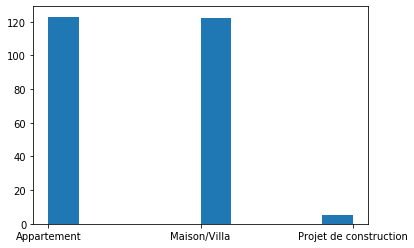

In [19]:
#we can see that in general there is more appartments to buy than Maison/Villas and very few units under construction
plt.hist(new_dataframe['type'])

(array([116.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 134.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

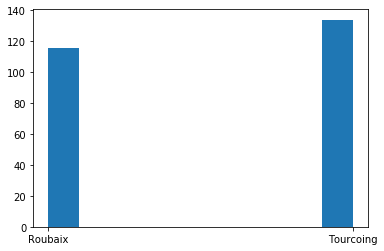

In [20]:
#this graph shows the distribution of the offered units accros tourcoing and roubaix
plt.hist(new_dataframe['city'])

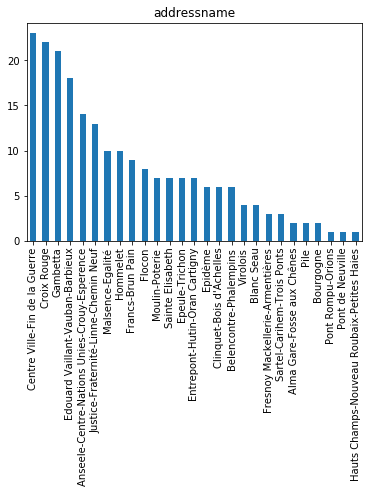

In [28]:
#plot the most address names where there is units to buy
#as the output shows most of the offered units are in centre ville fin de la guerre followed by gambetta
new_dataframe['addressname'].value_counts().plot(kind='bar', subplots=True)

In [36]:
#lets import our basetable excel sheet 
df = pd.read_excel (r'C:\Users\oabdelgelil\Desktop\Python Individual\results10cleanedtoday.xlsx')
print (df)

                       type           area totalPrice     monthlyPrice  \
0               Appartement   3 p2 ch60 m²   95 000 €       401€/mois    
1              Maison/Villa   5 p3 ch93 m²  235 000 €       977€/mois    
2              Maison/Villa  9 p6 ch350 m²  625 000 €     2 584€/mois    
3              Maison/Villa   5 p3 ch77 m²  119 500 €       501€/mois    
4               Appartement   3 p2 ch71 m²  127 000 €       532€/mois    
..                      ...            ...        ...              ...   
245            Maison/Villa  7 p5 ch194 m²  222 000 €       924€/mois    
246            Maison/Villa   5 p4 ch95 m²   82 000 €       347€/mois    
247            Maison/Villa  5 p3 ch110 m²  174 500 €       728€/mois    
248            Maison/Villa  5 p4 ch100 m²   90 000 €       380€/mois    
249  Projet de construction  6 p4 ch133 m²  245 900 €     1 022€/mois    

                                               address       city  \
0    Roubaix,Anseele-Centre-Nations Unies-

In [23]:
pip install bokeh

Note: you may need to restart the kernel to use updated packages.


In [71]:
#scatter plot that shows the correlation between the size and prices of the houses
#we can see that they are positevely correlated , when the size increases the price increases
from bokeh.plotting import figure, output_file, show
from bokeh.layouts import row
from bokeh.layouts import column


# output to static HTML file
output_file("line.html")

p = figure(plot_width=400, plot_height=400)

# add a circle renderer with a size, color, and alpha
p.circle(new_dataframe['totalPrice_group'], new_dataframe['size_group'], size=20, color="navy", alpha=0.5)

# show the results
# show(p)
#layout=row(p,column(p))
layout=row(p)
show(layout)

In [63]:
df1=df.groupby('city').mean()
df1
df1.reset_index(level=0, inplace=True)
df1

,city,size_group,totalPrice_group
0,Roubaix,114.054054,151724.137931
1,Tourcoing,91.875000,119402.985075


In [73]:
#price vs city graph
from bokeh.io import show, output_file
from bokeh.plotting import figure
# output to static HTML file
output_file("bars.html")
p = figure(x_range=df1['city'], title="Price vs City")
p.vbar(x=df1['city'], top=df1['totalPrice_group'], width=0.9)
# p.xgrid.grid_line_color = None
# p.y_range.start = 0

show(p)
#layout=row(p,column(p))
#show(layout)
# add a circle renderer with a size, color, and alpha
#p.circle(new_dataframe['totalPrice_group'], new_dataframe['city'], size=20, color="navy", alpha=0.5)
#p = Bar(df, values='totalPrice_group',label='city')
#show(p)
# show the results
# show(p)
#layout=row(p,column(p))
#layout=row(p)
#show(layout)

In [81]:
# size vs city graph
# output to static HTML file
output_file("bars2.html")
p = figure(x_range=df1['city'], title="Size vs City")
p.vbar(x=df1['city'], top=df1['size_group'], width=0.9)
# p.xgrid.grid_line_color = None
# p.y_range.start = 0

show(p)